In [1]:
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import ImageGrid
import pickle
from IPython.display import display
import seaborn

In [2]:
# Read results of all trials from result files
EXPERIMENT_ID = '43'
TRIAL_NUM = 5
DISPLAY_ROUND = 20
NUM_HEAD = 4

trial_results = []

for trial in range(TRIAL_NUM):
    OUTPUT_FILE = os.path.join('output_logs', EXPERIMENT_ID + '_output'  + '_trial_' + str(trial)+ '.csv')
    with open(OUTPUT_FILE, 'r') as fin:
        data_iter = csv.reader(fin)
        data = [np.array(data) for data in data_iter]
    data_array = np.array(data)
    header_array = data_array[0]
    
    #for i, header in enumerate(header_array):
    #    print(str(i) + ') ' + header)
    #print(header_array)
    data_array = data_array[1:]
    #print(data_array.shape)
    data_array = data_array.astype(np.float32)

    comm_rounds = data_array[:DISPLAY_ROUND,0].astype(np.int)
    fedAvg_test_loss = data_array[:DISPLAY_ROUND,17]
    matched_fedAvg_test_loss = data_array[:DISPLAY_ROUND,18]
    fedAvg_test_disagreement_loss = data_array[:DISPLAY_ROUND,19]
    matched_fedAvg_test_disagreement_loss = data_array[:DISPLAY_ROUND,20]
    fedAvg_test_classification_loss = data_array[:DISPLAY_ROUND,21]
    matched_fedAvg_test_classification_loss = data_array[:DISPLAY_ROUND,22]
    fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,23]
    matched_fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,24]
    fedAVG_local_loss_1 = data_array[:DISPLAY_ROUND,1]
    fedAVG_local_loss_2 = data_array[:DISPLAY_ROUND,2]
    matched_fedAVG_local_loss_1 = data_array[:DISPLAY_ROUND,3]
    matched_fedAVG_local_loss_2 = data_array[:DISPLAY_ROUND,4]
    fedAVG_local_disagreement_loss_1 = data_array[:DISPLAY_ROUND,5]
    fedAVG_local_disagreement_loss_2 = data_array[:DISPLAY_ROUND,6]
    matched_fedAVG_local_disagreement_loss_1 = data_array[:DISPLAY_ROUND,7]
    matched_fedAVG_local_disagreement_loss_2 = data_array[:DISPLAY_ROUND,8]
    fedAVG_local_classification_loss_1 = data_array[:DISPLAY_ROUND,9]
    fedAVG_local_classification_loss_2 = data_array[:DISPLAY_ROUND,10]
    matched_fedAVG_local_classification_loss_1 = data_array[:DISPLAY_ROUND,11]
    matched_fedAVG_local_classification_loss_2 = data_array[:DISPLAY_ROUND,12]
    fedAVG_local_accuracy_1 = data_array[:DISPLAY_ROUND,13]
    fedAVG_local_accuracy_2 = data_array[:DISPLAY_ROUND,14]
    matched_fedAVG_local_accuracy_1 = data_array[:DISPLAY_ROUND,15]
    matched_fedAVG_local_accuracy_2 = data_array[:DISPLAY_ROUND,16]
    
    baseline_local_loss = data_array[:DISPLAY_ROUND,25]
    baseline_local_disagreement_loss = data_array[:DISPLAY_ROUND,26]
    baseline_local_classification_loss = data_array[:DISPLAY_ROUND,27]
    baseline_local_accuracy = data_array[:DISPLAY_ROUND,28]
    baseline_test_loss = data_array[:DISPLAY_ROUND,29]
    baseline_test_disagreement_loss = data_array[:DISPLAY_ROUND,30]
    baseline_test_classification_loss = data_array[:DISPLAY_ROUND,31]
    baseline_global_accuracy = data_array[:DISPLAY_ROUND,32]
    
    fedAVG_homo_local_loss_1 = data_array[:DISPLAY_ROUND,33]
    fedAVG_homo_local_loss_2 = data_array[:DISPLAY_ROUND,34]
    fedAVG_homo_local_disagreement_loss_1 = data_array[:DISPLAY_ROUND,35]
    fedAVG_homo_local_disagreement_loss_2 = data_array[:DISPLAY_ROUND,36]
    fedAVG_homo_local_classification_loss_1 = data_array[:DISPLAY_ROUND,37]
    fedAVG_homo_local_classification_loss_2 = data_array[:DISPLAY_ROUND,38]
    fedAVG_homo_local_accuracy_1 = data_array[:DISPLAY_ROUND,39]
    fedAVG_homo_local_accuracy_2 = data_array[:DISPLAY_ROUND,40]
    fedAvg_homo_test_loss = data_array[:DISPLAY_ROUND,41]
    fedAvg_homo_test_disagreement_loss = data_array[:DISPLAY_ROUND,42]
    fedAvg_homo_test_classification_loss = data_array[:DISPLAY_ROUND,43]
    fedAvg_homo_test_accuracy = data_array[:DISPLAY_ROUND,44]

    trial_results.append({
        'comm_rounds': comm_rounds,
        'fedAvg_test_loss': fedAvg_test_loss,
        'matched_fedAvg_test_loss': matched_fedAvg_test_loss,
        'fedAvg_test_disagreement_loss': fedAvg_test_disagreement_loss,
        'matched_fedAvg_test_disagreement_loss': matched_fedAvg_test_disagreement_loss,
        'fedAvg_test_classification_loss': fedAvg_test_classification_loss,
        'matched_fedAvg_test_classification_loss': matched_fedAvg_test_classification_loss,
        'fedAvg_test_accuracy': fedAvg_test_accuracy,
        'matched_fedAvg_test_accuracy': matched_fedAvg_test_accuracy,
        'fedAVG_local_loss_1': fedAVG_local_loss_1,
        'fedAVG_local_loss_2': fedAVG_local_loss_2,
        'matched_fedAVG_local_loss_1': matched_fedAVG_local_loss_1,
        'matched_fedAVG_local_loss_2': matched_fedAVG_local_loss_2,
        'fedAVG_local_disagreement_loss_1': fedAVG_local_disagreement_loss_1,
        'fedAVG_local_disagreement_loss_2': fedAVG_local_disagreement_loss_2,
        'matched_fedAVG_local_disagreement_loss_1': matched_fedAVG_local_disagreement_loss_1,
        'matched_fedAVG_local_disagreement_loss_2': matched_fedAVG_local_disagreement_loss_2,
        'fedAVG_local_classification_loss_1': fedAVG_local_classification_loss_1,
        'fedAVG_local_classification_loss_2': fedAVG_local_classification_loss_2,
        'matched_fedAVG_local_classification_loss_1': matched_fedAVG_local_classification_loss_1,
        'matched_fedAVG_local_classification_loss_2': matched_fedAVG_local_classification_loss_2,
        'fedAVG_local_accuracy_1': fedAVG_local_accuracy_1,
        'fedAVG_local_accuracy_2': fedAVG_local_accuracy_2,
        'matched_fedAVG_local_accuracy_1': matched_fedAVG_local_accuracy_1,
        'matched_fedAVG_local_accuracy_2': matched_fedAVG_local_accuracy_2,
        'baseline_local_loss': baseline_local_loss,
        'baseline_local_disagreement_loss': baseline_local_disagreement_loss,
        'baseline_local_classification_loss': baseline_local_classification_loss,
        'baseline_local_accuracy': baseline_local_accuracy,
        'baseline_test_loss': baseline_test_loss,
        'baseline_test_disagreement_loss': baseline_test_disagreement_loss,
        'baseline_test_classification_loss': baseline_test_classification_loss,
        'baseline_global_accuracy': baseline_global_accuracy,
        'fedAVG_homo_local_loss_1': fedAVG_homo_local_loss_1,
        'fedAVG_homo_local_loss_2': fedAVG_homo_local_loss_2,
        'fedAVG_homo_local_disagreement_loss_1': fedAVG_homo_local_disagreement_loss_1,
        'fedAVG_homo_local_disagreement_loss_2': fedAVG_homo_local_disagreement_loss_2,
        'fedAVG_homo_local_classification_loss_1': fedAVG_homo_local_classification_loss_1,
        'fedAVG_homo_local_classification_loss_2': fedAVG_homo_local_classification_loss_2,
        'fedAVG_homo_local_accuracy_1': fedAVG_homo_local_accuracy_1,
        'fedAVG_homo_local_accuracy_2': fedAVG_homo_local_accuracy_2,
        'fedAvg_homo_test_loss': fedAvg_homo_test_loss,
        'fedAvg_homo_test_disagreement_loss': fedAvg_homo_test_disagreement_loss,
        'fedAvg_homo_test_classification_loss': fedAvg_homo_test_classification_loss,
        'fedAvg_homo_test_accuracy': fedAvg_homo_test_accuracy,
    })

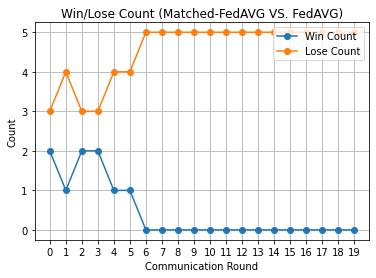

In [3]:
# Calculate count of win rate for matched_fedAVG against vanilla fedAVG.
# Use loss on test set as an indicator.
comm_rounds = trial_results[0]['comm_rounds']
win_counts = np.array([0 for _ in range(len(comm_rounds))])
lose_counts = np.array([0 for _ in range(len(comm_rounds))])

for trial_result in trial_results:
    loss_fedAVG = trial_result['fedAvg_test_classification_loss']
    loss_matched_fedAVG = trial_result['matched_fedAvg_test_classification_loss']    
    lose_list = loss_fedAVG < loss_matched_fedAVG
    win_list = loss_fedAVG > loss_matched_fedAVG
    lose_count = lose_list.astype(int)
    win_count = win_list.astype(int)
    lose_counts = lose_counts + lose_count
    win_counts = win_counts + win_count
    
plt.plot(comm_rounds, win_counts, marker='o', label='Win Count')
plt.plot(comm_rounds, lose_counts, marker='o', label='Lose Count')
plt.title('Win/Lose Count (Matched-FedAVG VS. FedAVG)')
plt.xlabel('Communication Round')
plt.ylabel('Count')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

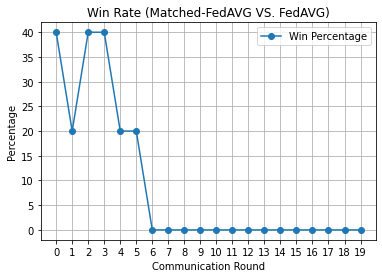

In [4]:
# Calculate percentage of win rate for matched_fedAVG against vanilla fedAVG.
# Use loss on test set as an indicator.
comm_rounds = trial_results[0]['comm_rounds']
win_counts = np.array([0 for _ in range(len(comm_rounds))])
lose_counts = np.array([0 for _ in range(len(comm_rounds))])

for trial_result in trial_results:
    loss_fedAVG = trial_result['fedAvg_test_classification_loss']
    loss_matched_fedAVG = trial_result['matched_fedAvg_test_classification_loss']    
    lose_list = loss_fedAVG < loss_matched_fedAVG
    win_list = loss_fedAVG > loss_matched_fedAVG
    lose_count = lose_list.astype(int)
    win_count = win_list.astype(int)
    lose_counts = lose_counts + lose_count
    win_counts = win_counts + win_count

percentages = win_counts * 100.00 / (win_counts + lose_counts)

plt.plot(comm_rounds, percentages, marker='o', label='Win Percentage')
plt.title('Win Rate (Matched-FedAVG VS. FedAVG)')
plt.xlabel('Communication Round')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

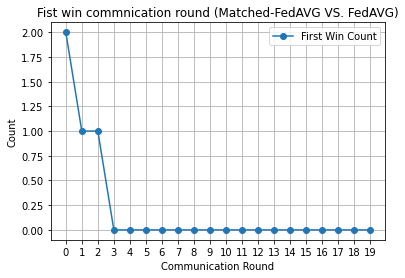

In [5]:
# Calculate communication round the winning start at the ith round and plot it
# Use loss on test set as an indicator.
comm_rounds = trial_results[0]['comm_rounds']
win_comm_rounds = np.array([0 for _ in range(len(comm_rounds))])

for trial_result in trial_results:
    loss_fedAVG = trial_result['fedAvg_test_classification_loss']
    loss_matched_fedAVG = trial_result['matched_fedAvg_test_classification_loss']    
    
    #print(str(loss_fedAVG) + ' vs. ' + str(loss_matched_fedAVG))
    
    lose_list = loss_fedAVG < loss_matched_fedAVG
    win_list = loss_fedAVG > loss_matched_fedAVG

    #print(str(lose_list))
    #print(str(win_list))

    for i in range(len(comm_rounds)):
        if win_list[i]:
            win_comm_rounds[i] = win_comm_rounds[i] + 1
            break
            
plt.plot(comm_rounds, win_comm_rounds, marker='o', label='First Win Count')
plt.title('Fist win commnication round (Matched-FedAVG VS. FedAVG)')
plt.xlabel('Communication Round')
plt.ylabel('Count')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

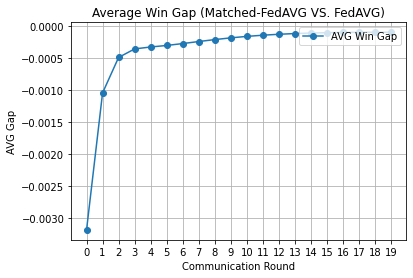

In [6]:
# Calculate win gap for each communication round
# Use loss on test set as an indicator.
comm_rounds = trial_results[0]['comm_rounds']
avg_win_gaps = np.array([0 for _ in range(len(comm_rounds))])

for trial_result in trial_results:
    loss_fedAVG = trial_result['fedAvg_test_classification_loss']
    loss_matched_fedAVG = trial_result['matched_fedAvg_test_classification_loss']    
    
    # print(str(loss_fedAVG) + ' vs. ' + str(loss_matched_fedAVG))
    win_gap = loss_fedAVG - loss_matched_fedAVG
    avg_win_gaps = avg_win_gaps + win_gap
    
avg_win_gaps = avg_win_gaps / TRIAL_NUM
            
plt.plot(comm_rounds, avg_win_gaps, marker='o', label='AVG Win Gap')
plt.title('Average Win Gap (Matched-FedAVG VS. FedAVG)')
plt.xlabel('Communication Round')
plt.ylabel('AVG Gap')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

In [7]:
# Read all trials trainning stat
data_arrays = []

for i in range(TRIAL_NUM):
    OUTPUT_FILE = os.path.join('output_logs', EXPERIMENT_ID + '_output_trial_' + str(i) + '.csv')
    data_array = None
    with open(OUTPUT_FILE, 'r') as fin:
        data_iter = csv.reader(fin)
        data = [np.array(data) for data in data_iter]
    data_array = np.array(data)
    data_array = data_array[1:]
    data_array = data_array.astype(np.float32)
    data_arrays.append(data_array)


Test Loss from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)


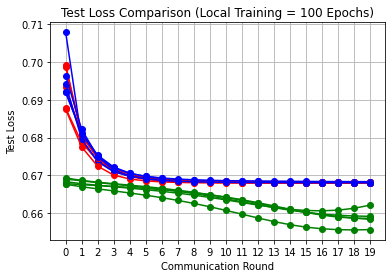

In [8]:
# Also plot test loss individually
for i in range(TRIAL_NUM):
    data_array = data_arrays[i]
    comm_rounds = data_array[:DISPLAY_ROUND,0].astype(np.int)
    baseline_test_loss = data_array[:DISPLAY_ROUND,29]
    fedAvg_test_loss = data_array[:DISPLAY_ROUND,17]
    matched_fedAvg_test_loss = data_array[:DISPLAY_ROUND,18]
    fedAvg_homo_test_loss = data_array[:DISPLAY_ROUND,41]
    plt.plot(comm_rounds, baseline_test_loss, marker='o', color='green', label='Baseline: ' + str(i))
    plt.plot(comm_rounds, fedAvg_test_loss, marker='o', color='red', label='FedAVG: ' + str(i))
    plt.plot(comm_rounds, matched_fedAvg_test_loss, marker='o', color='blue', label='Matched FedAVG: ' + str(i))
    # plt.plot(comm_rounds, fedAvg_homo_test_loss, marker='o', color='purple', label='FedAVG (Homogeneous): ' + str(i))

print('Test Loss from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)')
plt.title('Test Loss Comparison (Local Training = 100 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Test Loss')
plt.grid(True)
# plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

Training Loss from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG) - Node:0


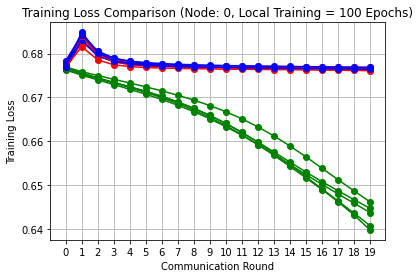

Training Loss from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG) - Node:1


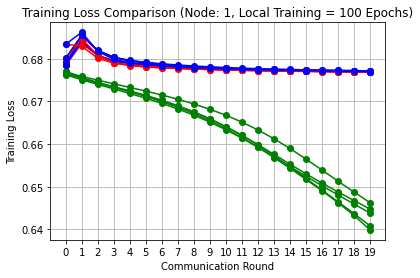

In [9]:
# Also plot loss from all training node (training loss)
NODE_COUNT = 2
for node in range(NODE_COUNT):
    for i in range(TRIAL_NUM):
        data_array = data_arrays[i]
        comm_rounds = data_array[:DISPLAY_ROUND,0].astype(np.int)
        baseline_local_loss = data_array[:DISPLAY_ROUND,25]
        fedAVG_local_loss = data_array[:DISPLAY_ROUND,1 + node]
        matched_fedAVG_local_loss = data_array[:DISPLAY_ROUND,3 + node]
        fedAVG_homo_local_loss = data_array[:DISPLAY_ROUND,33 + node]
        plt.plot(comm_rounds, baseline_local_loss, marker='o', color='green', label='Baseline: ' + str(i))
        plt.plot(comm_rounds, fedAVG_local_loss, marker='o', color='red', label='FedAVG Train: ' + str(i))
        plt.plot(comm_rounds, matched_fedAVG_local_loss, marker='o', color='blue', label='Matched FedAVG Train: ' + str(i))
        # plt.plot(comm_rounds, fedAVG_homo_local_loss, marker='o', color='purple', label='FedAVG (Homogeneous): ' + str(i))

    print('Training Loss from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG) - Node:' + str(node))
    plt.title('Training Loss Comparison (Node: ' + str(node) + ', Local Training = 100 Epochs)')
    plt.xlabel('Communication Round')
    plt.ylabel('Training Loss')
    plt.grid(True)
    # plt.legend(loc="upper right")
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    #plt.ylim(0.15, 0.4)
    plt.show()

Test Accuracy from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)


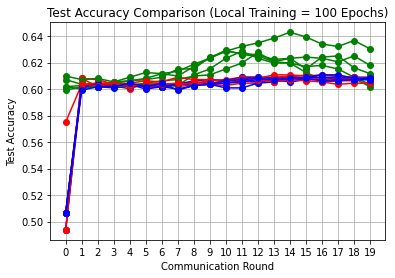

In [10]:
# Also plot test accuracy individually
for i in range(TRIAL_NUM):
    data_array = data_arrays[i]
    comm_rounds = data_array[:DISPLAY_ROUND,0].astype(np.int)
    baseline_test_accuracy = data_array[:DISPLAY_ROUND,32]
    fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,23]
    matched_fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,24]
    fedAvg_homo_test_accuracy = data_array[:DISPLAY_ROUND,44]
    plt.plot(comm_rounds, baseline_test_accuracy, marker='o', color='green', label='Baseline: ' + str(i))
    plt.plot(comm_rounds, fedAvg_test_accuracy, marker='o', color='red', label='FedAVG: ' + str(i))
    plt.plot(comm_rounds, matched_fedAvg_test_accuracy, marker='o', color='blue', label='Matched FedAVG: ' + str(i))
    # plt.plot(comm_rounds, fedAvg_homo_test_accuracy, marker='o', color='purple', label='FedAVG (Homogeneous): ' + str(i))

print('Test Accuracy from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)')
plt.title('Test Accuracy Comparison (Local Training = 100 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Test Accuracy')
plt.grid(True)
# plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

Test Accuracy from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)


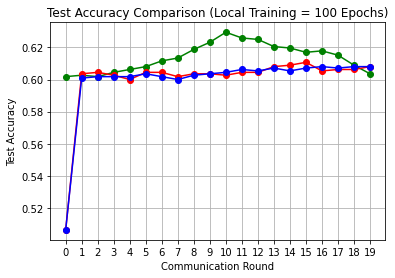

In [11]:
# Also plot test accuracy individually
for i in range(1): # range(TRIAL_NUM):
    data_array = data_arrays[i]
    comm_rounds = data_array[:DISPLAY_ROUND,0].astype(np.int)
    baseline_test_accuracy = data_array[:DISPLAY_ROUND,32]
    fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,23]
    matched_fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,24]
    fedAvg_homo_test_accuracy = data_array[:DISPLAY_ROUND,44]
    plt.plot(comm_rounds, baseline_test_accuracy, marker='o', color='green', label='Baseline: ' + str(i))
    plt.plot(comm_rounds, fedAvg_test_accuracy, marker='o', color='red', label='FedAVG: ' + str(i))
    plt.plot(comm_rounds, matched_fedAvg_test_accuracy, marker='o', color='blue', label='Matched FedAVG: ' + str(i))
    # plt.plot(comm_rounds, fedAvg_homo_test_accuracy, marker='o', color='purple', label='FedAVG (Homogeneous): ' + str(i))

print('Test Accuracy from each trial (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)')
plt.title('Test Accuracy Comparison (Local Training = 100 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Test Accuracy')
plt.grid(True)
# plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()

Average Test Accuracy from all trials (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)


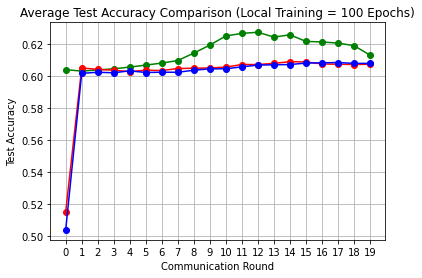

In [12]:
# Plot average test accuracy individually
data_arrays_np = np.array(data_arrays)
data_arrays_avg = np.average(data_arrays_np, axis=0)

data_array = data_arrays_avg
comm_rounds = data_array[:DISPLAY_ROUND,0].astype(np.int)
baseline_test_accuracy = data_array[:DISPLAY_ROUND,32]
fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,23]
matched_fedAvg_test_accuracy = data_array[:DISPLAY_ROUND,24]
fedAvg_homo_test_accuracy = data_array[:DISPLAY_ROUND,44]
plt.plot(comm_rounds, baseline_test_accuracy, marker='o', color='green', label='Baseline: ' + str(i))
plt.plot(comm_rounds, fedAvg_test_accuracy, marker='o', color='red', label='FedAVG: ' + str(i))
plt.plot(comm_rounds, matched_fedAvg_test_accuracy, marker='o', color='blue', label='Matched FedAVG: ' + str(i))
# plt.plot(comm_rounds, fedAvg_homo_test_accuracy, marker='o', color='purple', label='FedAVG (Homogeneous): ' + str(i))

print('Average Test Accuracy from all trials (Green=Baseline, Purple=FedAVG(H), Red=FedAVG, Blue=Matched-FedAVG)')
plt.title('Average Test Accuracy Comparison (Local Training = 100 Epochs)')
plt.xlabel('Communication Round')
plt.ylabel('Test Accuracy')
plt.grid(True)
# plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#plt.ylim(0.15, 0.4)
plt.show()
